In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drug=pd.read_csv('/content/drug.csv')

In [ ]:
drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
drug
drug.columns=["age","sex","bp","c","na_k","drug"]

In [ ]:
demo_drug=drug[["age","sex","bp","c","na_k","drug"]]
demo_drug

,age,sex,bp,c,na_k,drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(drug['sex'])
label
drug.drop("sex", axis=1, inplace=True)
drug["sex"] = label
drug

,age,bp,c,na_k,drug,sex
0,23,HIGH,HIGH,25.355,DrugY,0
1,47,LOW,HIGH,13.093,drugC,1
2,47,LOW,HIGH,10.114,drugC,1
3,28,NORMAL,HIGH,7.798,drugX,0
4,61,LOW,HIGH,18.043,DrugY,0
...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,0
196,16,LOW,HIGH,12.006,drugC,1
197,52,NORMAL,HIGH,9.894,drugX,1
198,23,NORMAL,NORMAL,14.020,drugX,1


In [ ]:
label = le.fit_transform(drug['bp'])
label
drug.drop("bp", axis=1, inplace=True)
drug["bp"] = label
drug

,age,c,na_k,drug,sex,bp
0,23,HIGH,25.355,DrugY,0,0
1,47,HIGH,13.093,drugC,1,1
2,47,HIGH,10.114,drugC,1,1
3,28,HIGH,7.798,drugX,0,2
4,61,HIGH,18.043,DrugY,0,1
...,...,...,...,...,...,...
195,56,HIGH,11.567,drugC,0,1
196,16,HIGH,12.006,drugC,1,1
197,52,HIGH,9.894,drugX,1,2
198,23,NORMAL,14.020,drugX,1,2


In [ ]:
label = le.fit_transform(drug['c'])
label
drug.drop("c", axis=1, inplace=True)
drug["c"] = label
drug

,age,na_k,drug,sex,bp,c
0,23,25.355,DrugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,DrugY,0,1,0
...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0
196,16,12.006,drugC,1,1,0
197,52,9.894,drugX,1,2,0
198,23,14.020,drugX,1,2,1


In [ ]:
temp=drug["na_k"]
del drug["na_k"]
drug["na_k"]=temp

In [ ]:
label = le.fit_transform(drug['drug'])
label
drug.drop("drug", axis=1, inplace=True)
drug["drug"] = label
drug

,age,sex,bp,c,na_k,drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
drug["drug"].value_counts()

0    91
4    54
1    23
3    16
2    16
Name: drug, dtype: int64

In [ ]:
drug.isnull().sum()

age     0
sex     0
bp      0
c       0
na_k    0
drug    0
dtype: int64

In [ ]:
drug.dtypes

age       int64
sex       int64
bp        int64
c         int64
na_k    float64
drug      int64
dtype: object

In [ ]:
drug.groupby(drug["age"]).sum()

,sex,bp,c,na_k,drug
age,,,,,
15,2,2,2,43.015,4
16,2,1,2,46.529,3
17,1,2,1,10.832,4
18,0,2,2,70.214,4
19,0,0,1,39.282,1
20,1,3,3,67.868,9
21,0,0,1,28.632,0
22,3,5,2,79.823,11
23,6,9,1,115.480,12


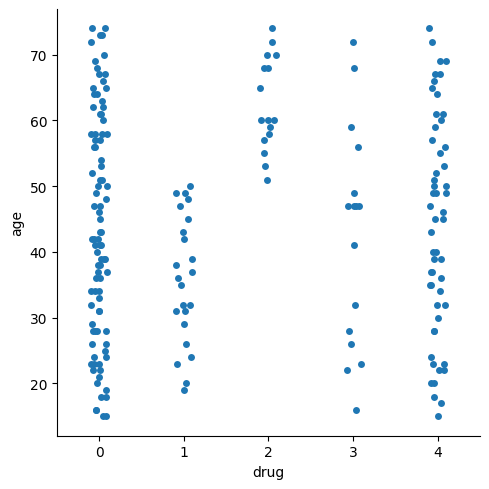

In [ ]:
sns.catplot(data=demo_drug,x="drug",y="age")

<Axes: xlabel='age', ylabel='Count'>

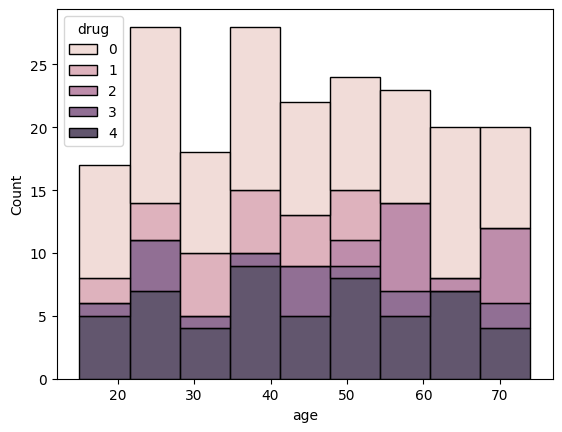

In [ ]:
sns.histplot(data=demo_drug,x="age",hue="drug",multiple="stack")

<Axes: xlabel='drug', ylabel='na_k'>

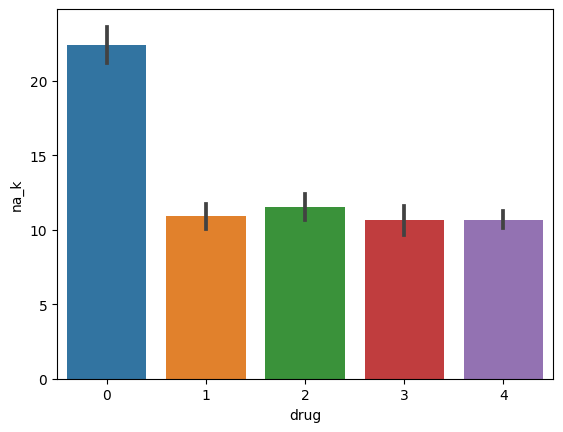

In [ ]:
sns.barplot(data=demo_drug,x="drug",y="na_k")

<Axes: >

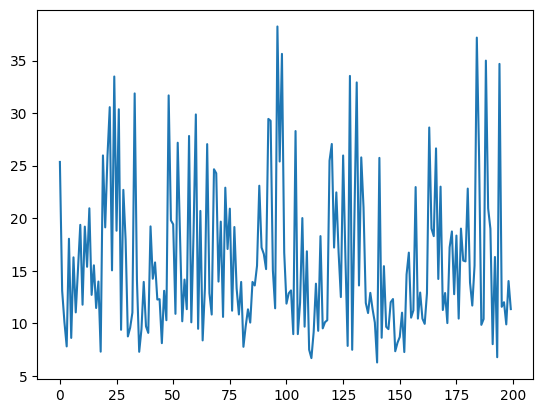

In [ ]:
demo_drug["na_k"].plot()

In [ ]:
drug.columns

Index(['age', 'sex', 'bp', 'c', 'na_k', 'drug'], dtype='object')

<Axes: xlabel='drug', ylabel='bp'>

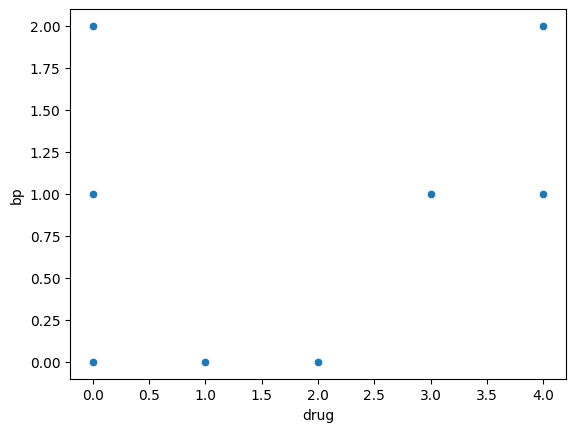

In [ ]:
sns.scatterplot(data=demo_drug,x="drug",y="bp")

<Axes: xlabel='age', ylabel='na_k'>

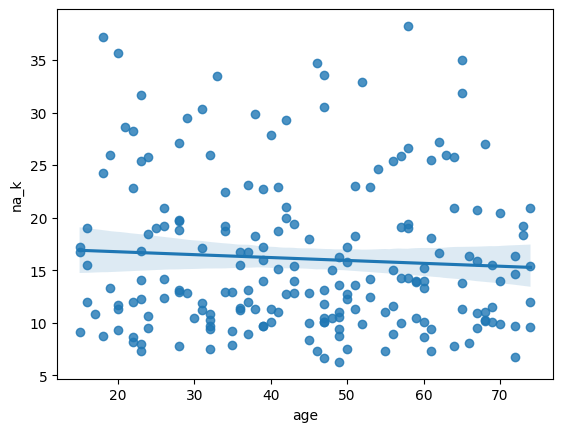

In [ ]:
sns.regplot(data=demo_drug,x="age",y="na_k")

In [ ]:
drug.head()

,age,sex,bp,c,na_k,drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


<Axes: xlabel='c', ylabel='age'>

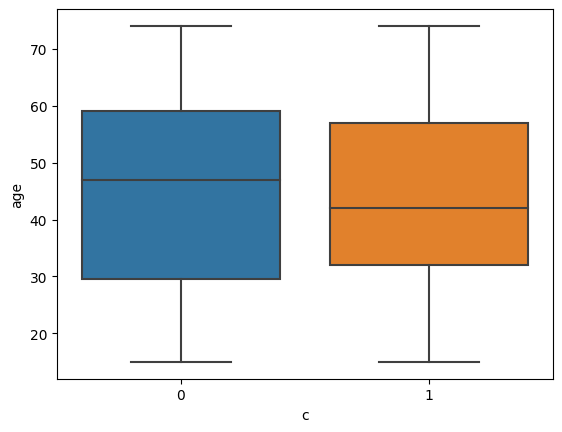

In [ ]:
sns.boxplot(data=demo_drug,x="c",y="age")

<Axes: xlabel='c', ylabel='drug'>

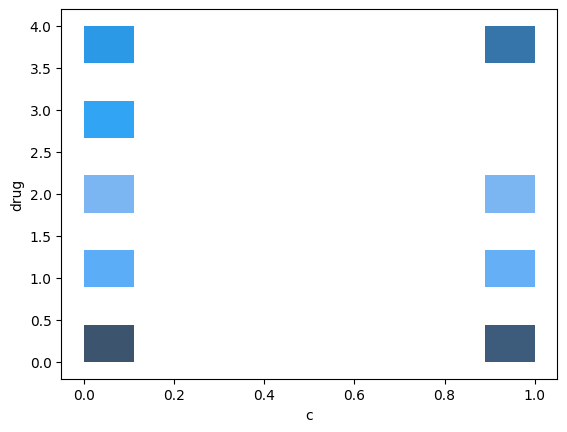

In [ ]:
sns.histplot(data=demo_drug,x="c",y="drug")

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
drug.shape

(200, 6)

In [ ]:
x=drug[["age","sex","bp","na_k"]].copy()
y=drug["drug"]

In [ ]:
x

,age,sex,bp,na_k
0,23,0,0,25.355
1,47,1,1,13.093
2,47,1,1,10.114
3,28,0,2,7.798
4,61,0,1,18.043
...,...,...,...,...
195,56,0,1,11.567
196,16,1,1,12.006
197,52,1,2,9.894
198,23,1,2,14.020


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
          x, y, test_size = 0.2, random_state = 3)

In [ ]:
x_train

,age,sex,bp,na_k
156,31,1,0,11.227
115,51,1,0,18.295
155,49,1,1,10.537
15,16,0,0,15.516
61,24,1,0,9.475
...,...,...,...,...
0,23,0,0,25.355
184,18,0,0,37.188
131,52,1,1,32.922
152,55,1,2,7.261


In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction=model.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))
print(mean_absolute_error(y_test,prediction))

0.8
0.5


In [ ]:
x_train

,age,sex,bp,na_k
156,31,1,0,11.227
115,51,1,0,18.295
155,49,1,1,10.537
15,16,0,0,15.516
61,24,1,0,9.475
...,...,...,...,...
0,23,0,0,25.355
184,18,0,0,37.188
131,52,1,1,32.922
152,55,1,2,7.261


In [ ]:
drug["drug"].value_counts()

0    91
4    54
1    23
3    16
2    16
Name: drug, dtype: int64

In [ ]:
input=np.array([50,1,2,15.55]).reshape(1,4)
p=model.predict(input)
if p==0: print("drug_0")
elif p==1: print("drug_1")
elif p==2: print("drug_2")
elif p==3: print("drug_3")
else: print("drug_4")

drug_4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input=np.array([18,0,0,5.55]).reshape(1,4)
p=model.predict(input)
if p==0: print("drug_0")
elif p==1: print("drug_1")
elif p==2: print("drug_2")
elif p==3: print("drug_3")
else: print("drug_4")

drug_1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
